In [1]:
using DifferentialEquations, Plots


function R_1(x)
    x * exp(-x)
end

function R_2(x, y)
    abs(x - y) * exp(- abs(x - y))
end

# represents derivatives du, functions u, model parameters p, and time t
function love_model(du, u, p, t) 
     A_1, A_2, A_3, alpha, rho, K = p
     du[1] = - alpha * u[1] + rho * A_2 + K * R_1(u[2])
     du[2] = - alpha * u[2] + rho * (A_1 + A_3) + K * R_2(u[1], u[3])
     du[3] = - alpha * u[3] + rho * A_1 + K * R_1(u[2])
end

love_model (generic function with 1 method)

In [2]:
model_parameters = [1., 1., 1., 1., 1., 15.]
initial_vals = [1., 1., 0.]
tspan = (0., 50.)



prob = ODEProblem(love_model, initial_vals, tspan, model_parameters)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 37-element Vector{Float64}:
  0.0
  0.00021674716458878115
  0.0023842188104765925
  0.01829851390476181
  0.057250832809656274
  0.11985825123238876
  0.20627997543283966
  0.3290790360646556
  0.5013079326878043
  0.7381720266941968
  1.0263232944902558
  1.3675196342698024
  1.7539580780935706
  ⋮
 14.377326396531222
 16.538403823063465
 19.867470958825336
 23.84217116149011
 27.600312869732097
 31.067436178406687
 34.411610542643714
 37.732828451896154
 41.08282857360395
 44.47714589157117
 47.90864081588
 50.0
u: 37-element Vector{Vector{Float64}}:
 [1.0, 1.0, 0.0]
 [1.0011959223781288, 1.001412646442904, 0.001412646054747856]
 [1.0131403803893693, 1.0155222710018792, 0.015521759207680185]
 [1.0998348439865557, 1.1181830009919138, 0.11796695659702681]
 [1.301260749710402, 1.3625230254727558, 0.3569035858150322]
 [1.5816682048799375, 1.7347658303

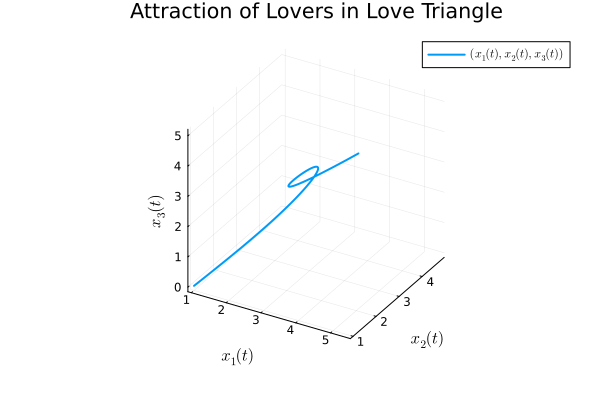

In [3]:
using LaTeXStrings

plot(sol, idxs=(1, 2, 3), linewidth=2, title ="Attraction of Lovers in Love Triangle",
    xaxis = L"x_1(t)", yaxis = L"x_2(t)", zaxis=L"x_3(t)", label=L"(x_1(t), x_2(t), x_3(t))"
)

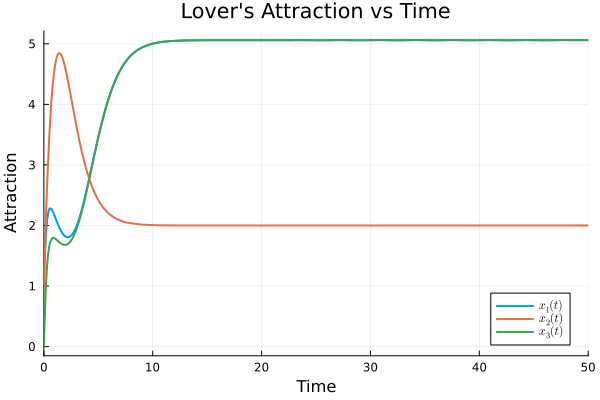

In [4]:
plot(sol, linewidth=2, title ="Lover's Attraction vs Time", xaxis = "Time", 
    yaxis = "Attraction", label=[L"x_1(t)" L"x_2(t)" L"x_3(t)"]
)

In [6]:
using CairoMakie

struct LoveModelParams{T}
    A_1::T
    A_2::T
    A_3::T
    alpha::T
    rho::T
    K::T
end

P = LoveModelParams(1., 1.,1., 1., 1., 15.)

f(u, P::LoveModelParams) = Point3f0(
    - P.alpha * u[1] + P.rho * P.A_2 + P.K * R_1(u[2]),
    - P.alpha * u[2] + P.rho * P.A_1 + P.K * R_2(u[1], u[3]),
    - P.alpha * u[3] + P.rho * A_1 + P.K * R_1(u[1])
)

f(x) = f(x, P)



[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
ERROR: LoadError: UndefVarError: is_splat_index not defined
Stacktrace:
 [1] getproperty(x::Module, f::Symbol)
   @ Base ./Base.jl:31
 [2] top-level scope
   @ ~/.julia/packages/EllipsisNotation/dIyPg/src/EllipsisNotation.jl:61
 [3] include
   @ ./Base.jl:419 [inlined]
 [4] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::String)
   @ Base ./loading.jl:1554
 [5] top-level scope
   @ stdin:1
in expression starting at /Users/colincurtis/.julia/packages/EllipsisNotation/dIyPg/src/EllipsisNotation.jl:3
in expression starting at stdin:1
ERROR: LoadError: Failed to precompile EllipsisNotation [da5c29d0-fa7d-589e-88eb-ea29b0a81949] to /Users/colincurtis/.julia/compiled/v1.8/EllipsisNotation/jl_2Rg6NC.
Stacktrace:
  [1] error(s::String)
    @ Base ./error.jl:35
  [2] compile

LoadError: Failed to precompile CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0] to /Users/colincurtis/.julia/compiled/v1.8/CairoMakie/jl_4FRvjr.

In [7]:
x = 1..5

LoadError: UndefVarError: .. not defined